In [1]:
from fasta_iterator_class import FASTAReader
import math
import matplotlib.pyplot as plt

In [14]:
nt_sequences=FASTAReader(open("seqdump.txt",'r'))
protein_alignment=FASTAReader(open('protein_alignment.txt'))
nt_alignment=open("nt_alignmnet.fa","w+")
for nt,prot in zip(nt_sequences,protein_alignment):
    #writes fasta query sequence
    nt_alignment.write(">"+nt[0]+"\n")
    seqwgaps=""
    nt_count=0
    prot_count=0
    protein=prot[1]
    dna=nt[1]
    #iterates through protein length 
    while prot_count<len(protein):
        if protein[prot_count]=="-":
            seqwgaps+="---"
        else:
            #only increase nucleotide index if you don't add gaps
            seqwgaps+=dna[nt_count:nt_count+3]
            nt_count+=3
        prot_count+=1
    nt_alignment.write(seqwgaps+"\n")
nt_alignment.close()       

In [4]:
codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}

In [5]:
gapped=FASTAReader(open("nt_alignmnet_josh.fa"))

ref=''
count=0
for query in gapped:
    if count==0:
        ref=query[1]
        break
    count+=1
gapped2=FASTAReader(open("nt_alignmnet.fa"))   
dN=[]
dS=[]
query_list=[]
for query in gapped2:
    query_list.append(query[1])

for r in range(0,len(ref),3): 
    dNtemp=0
    dStemp=0
    if ref[r:r+3]=="---":
        pass
    else: 
        nuc1=ref[r:r+3]
        aa1=codontable[nuc1]

        for query in query_list:

            #don't compare first sequence
            nuc2=query[r:r+3]
            #don't compare first sequence
            if ref==query:
                pass
            elif nuc2 not in codontable:
                pass
            else:
                aa2=codontable[nuc2]
                if (nuc1 != nuc2) and (aa1==aa2):
                    dStemp += 1
                elif (nuc1 != nuc2) and (aa1!= aa2):
                    dNtemp += 1

        dN.append(dNtemp)
        dS.append(dStemp)


In [8]:
dN

[531,
 50,
 573,
 621,
 623,
 488,
 645,
 656,
 623,
 670,
 847,
 857,
 645,
 718,
 793,
 772,
 794,
 869,
 853,
 871,
 871,
 873,
 819,
 800,
 487,
 868,
 482,
 877,
 878,
 874,
 899,
 957,
 951,
 835,
 821,
 894,
 824,
 965,
 964,
 708,
 784,
 896,
 967,
 979,
 916,
 905,
 842,
 716,
 971,
 915,
 979,
 950,
 931,
 975,
 558,
 905,
 906,
 906,
 717,
 906,
 898,
 903,
 713,
 705,
 903,
 712,
 902,
 878,
 907,
 907,
 718,
 908,
 909,
 693,
 907,
 904,
 904,
 908,
 908,
 908,
 605,
 401,
 960,
 655,
 951,
 930,
 981,
 966,
 983,
 898,
 987,
 778,
 913,
 796,
 838,
 913,
 989,
 871,
 949,
 822,
 823,
 983,
 987,
 796,
 905,
 912,
 912,
 536,
 369,
 746,
 744,
 745,
 745,
 307,
 682,
 746,
 746,
 746,
 746,
 746,
 912,
 789,
 911,
 911,
 841,
 868,
 877,
 534,
 910,
 798,
 908,
 555,
 745,
 745,
 745,
 745,
 744,
 744,
 741,
 527,
 744,
 907,
 833,
 856,
 567,
 688,
 907,
 830,
 986,
 981,
 602,
 892,
 795,
 988,
 848,
 776,
 838,
 910,
 901,
 906,
 989,
 916,
 989,
 785,
 981,
 994,
 935,

Text(0, 0.5, 'log2 dN/dS')

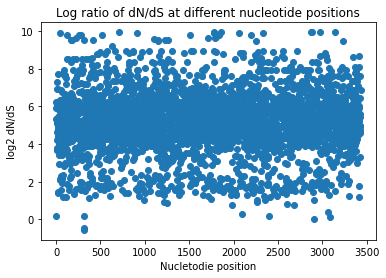

In [99]:
codon=[]
dNdS=[]
for i in range(len(dN)):
    if dN[i]!=0 and dS[i]!=0: 
        dNdS.append(math.log((dN[i]/dS[i]),2))
        codon.append(i)
fig,ax=plt.subplots()
ax.scatter(codon,dNdS)
ax.set_title("Log ratio of dN/dS at different nucleotide positions")
plt.xlabel("Nucletodie position")
plt.ylabel("log2 dN/dS")

In [ ]:
gapped=FASTAReader(open("nt_alignmnet.fa"))
ref=''
count=0
query_list=[]
for query in gapped:
    if count==0:
        ref=query[1]
    else:
        query_list.append(query[1])
    count+=1
dN=[]
dN_site=[]
dS=[]
dS_site=[]
for r in range(0,len(ref),3):
    dNtemp=0
    dStemp=0
    if ref[r:r+3]=="---":
        pass
    else:
        nuc1=ref[r:r+3]
        aa1=codontable[nuc1]
        for query in query_list:
            #don't compare first sequence
            nuc2=query[r:r+3]
            #don't compare first sequence
            if nuc2 not in codontable:
                pass
            else:
                aa2=codontable[nuc2]
                if nuc1!=nuc2:
                    if (aa1==aa2):
                        dStemp += 1
                    elif (aa1!= aa2):
                        dNtemp += 1
        dN.append(dNtemp)
        dS.append(dStemp)


In [11]:
gapped=FASTAReader(open("nt_alignmnet_josh.fa"))
ref=''
count=0
query_list=[]
for query in gapped:
    if count==0:
        ref=query[1]
    else:
        query_list.append(query[1])
    count+=1
dN=[]
dN_site=[]
dS=[]
dS_site=[]
for r in range(0,len(ref),3):
    dNtemp=0
    dStemp=0
    if ref[r:r+3]=="---":
        pass
    else:
        nuc1=ref[r:r+3]
        aa1=codontable[nuc1]
        for query in query_list:
            #don't compare first sequence
            nuc2=query[r:r+3]
            #don't compare first sequence
            if nuc2 not in codontable:
                pass
            else:
                aa2=codontable[nuc2]
                if nuc1!=nuc2:
                    if (aa1==aa2):
                        dStemp += 1
                    elif (aa1!= aa2):
                        dNtemp += 1
        dN.append(dNtemp)
        dS.append(dStemp)







In [12]:
dN

[522,
 288,
 554,
 600,
 598,
 580,
 619,
 641,
 633,
 630,
 838,
 834,
 734,
 654,
 758,
 756,
 791,
 848,
 826,
 840,
 856,
 856,
 832,
 830,
 624,
 831,
 622,
 838,
 845,
 773,
 873,
 901,
 916,
 853,
 819,
 853,
 807,
 948,
 937,
 763,
 797,
 861,
 887,
 963,
 901,
 891,
 854,
 698,
 927,
 894,
 904,
 936,
 960,
 957,
 725,
 866,
 889,
 860,
 728,
 874,
 869,
 874,
 712,
 747,
 878,
 718,
 881,
 853,
 895,
 874,
 682,
 885,
 889,
 708,
 883,
 885,
 881,
 889,
 891,
 892,
 697,
 573,
 906,
 755,
 947,
 954,
 973,
 921,
 941,
 933,
 916,
 792,
 856,
 794,
 817,
 890,
 910,
 864,
 934,
 800,
 804,
 971,
 935,
 821,
 851,
 869,
 882,
 668,
 532,
 688,
 729,
 711,
 736,
 491,
 698,
 724,
 690,
 726,
 707,
 742,
 869,
 830,
 856,
 874,
 823,
 837,
 870,
 690,
 901,
 810,
 831,
 564,
 728,
 732,
 705,
 720,
 731,
 712,
 715,
 580,
 718,
 848,
 857,
 881,
 676,
 729,
 869,
 862,
 951,
 948,
 740,
 918,
 803,
 966,
 883,
 778,
 879,
 885,
 857,
 870,
 940,
 961,
 947,
 820,
 942,
 981,
 943